In [ ]:
!pip install yfinance pandas numpy scikit-learn matplotlib mplcursors xgboost ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=793969f14a58e617136ce3f15a4ca0cfc37f3642d8e1db18b7706adbe181cfd5
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import timedelta
import xgboost as xgb

In [ ]:
# Ambil data saham
ticker = "BBRI.JK"
start_date = "2023-01-01"
end_date = "2025-05-10"
data = yf.download(ticker, start=start_date, end=end_date).dropna()


<ipython-input-3-3794583805>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date).dropna()
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.head())
print(data.tail())



Price             Close         High          Low         Open     Volume
Ticker          BBRI.JK      BBRI.JK      BBRI.JK      BBRI.JK    BBRI.JK
Date                                                                     
2023-01-02  3978.858643  4019.709347  3938.007938  4011.539206  100200100
2023-01-03  3962.518311  4003.369015  3946.178029  3946.178029   95136500
2023-01-04  3897.157471  3962.518602  3897.157471  3962.518602  188071000
2023-01-05  3790.945312  3888.987002  3733.754327  3880.816861  292142000
2023-01-06  3774.604980  3790.945262  3717.413996  3717.413996  175932000
Price        Close    High     Low    Open     Volume
Ticker     BBRI.JK BBRI.JK BBRI.JK BBRI.JK    BBRI.JK
Date                                                 
2025-05-05  3860.0  3920.0  3860.0  3900.0  196917100
2025-05-06  3880.0  3900.0  3840.0  3840.0  111333800
2025-05-07  3910.0  3910.0  3870.0  3900.0  119763100
2025-05-08  3790.0  3960.0  3780.0  3910.0  224121900
2025-05-09  3840.0  3840.0  37

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556 entries, 2023-01-02 to 2025-05-09
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BBRI.JK)   556 non-null    float64
 1   (High, BBRI.JK)    556 non-null    float64
 2   (Low, BBRI.JK)     556 non-null    float64
 3   (Open, BBRI.JK)    556 non-null    float64
 4   (Volume, BBRI.JK)  556 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 26.1 KB
None


In [ ]:
print(data.describe())

Price         Close         High          Low         Open        Volume
Ticker      BBRI.JK      BBRI.JK      BBRI.JK      BBRI.JK       BBRI.JK
count    556.000000   556.000000   556.000000   556.000000  5.560000e+02
mean    4408.712808  4459.823398  4365.530211  4410.577304  2.004934e+08
std      505.036567   502.544341   503.890281   503.332019  1.323432e+08
min     3175.730469  3345.858887  3175.730469  3270.246334  3.712660e+07
25%     3979.253418  4016.659363  3937.978304  3977.081165  1.096080e+08
50%     4427.524414  4492.399751  4384.708142  4432.396897  1.660994e+08
75%     4775.424316  4818.837402  4711.105653  4756.844517  2.581055e+08
max     5763.100098  5785.969664  5694.491883  5763.100219  1.000598e+09


In [ ]:
# Persiapan data
data.reset_index(inplace=True)
data['Day'] = (data['Date'] - data['Date'].min()).dt.days
data['Lag_1'] = data['Close'].shift(1)
data['Lag_3'] = data['Close'].shift(3)
data['MA_3'] = data['Close'].rolling(3).mean()
data['MA_7'] = data['Close'].rolling(7).mean()
data.dropna(inplace=True)

features = ['Day', 'Lag_1', 'Lag_3', 'MA_3', 'MA_7']
X = data[features]
X.columns = [col[0].strip() if isinstance(col, tuple) else col.strip() for col in X.columns]
y = data['Close']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Jumlah data total: {len(X)}")
print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}")


Jumlah data total: 550
Jumlah data train: 440
Jumlah data test: 110


In [ ]:
# Latih model Random Forest & XGBoost
model_rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluasi
y_pred_rf = model_rf.predict(X_test)

print("\nEvaluasi Random Forest:")
print(f"MAE  = {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R²   = {r2_score(y_test, y_pred_rf):.4f}")




Evaluasi Random Forest:
MAE  = 117.38
RMSE = 156.41
R²   = 0.2525


In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

print("\nEvaluasi XGBoost:")
print(f"MAE  = {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"R²   = {r2_score(y_test, y_pred_xgb):.4f}")


Evaluasi XGBoost:
MAE  = 197.41
RMSE = 236.20
R²   = -0.7048


In [ ]:
# Sliding window prediction (prediksi masa depan lebih realistis)
future_dates = []
future_preds_rf = []
future_preds_xgb = []
window_data = data.copy()

for i in range(1, 151):
    date = window_data['Date'].max() + timedelta(days=1)
    day = window_data['Day'].max() + 1

    lag_1 = window_data['Close'].iloc[-1]
    lag_3 = window_data['Close'].iloc[-3]
    ma_3 = window_data['Close'].iloc[-3:].mean()
    ma_7 = window_data['Close'].iloc[-7:].mean()

    row = pd.DataFrame([[day, lag_1, lag_3, ma_3, ma_7]], columns=features)
    row = row.astype(np.float32)

    pred_rf = model_rf.predict(row)[0]
    pred_xgb = model_xgb.predict(row)[0]

    # Simpan hasil dan tambahkan ke window data
    future_dates.append(date)
    future_preds_rf.append(pred_rf)
    future_preds_xgb.append(pred_xgb)

    new_row = pd.DataFrame({
        'Date': [date],
        'Day': [day],
        'Close': [pred_rf],
    })
    window_data = pd.concat([window_data, new_row], ignore_index=True)

<ipython-input-14-100229729>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  row = row.astype(np.float32)


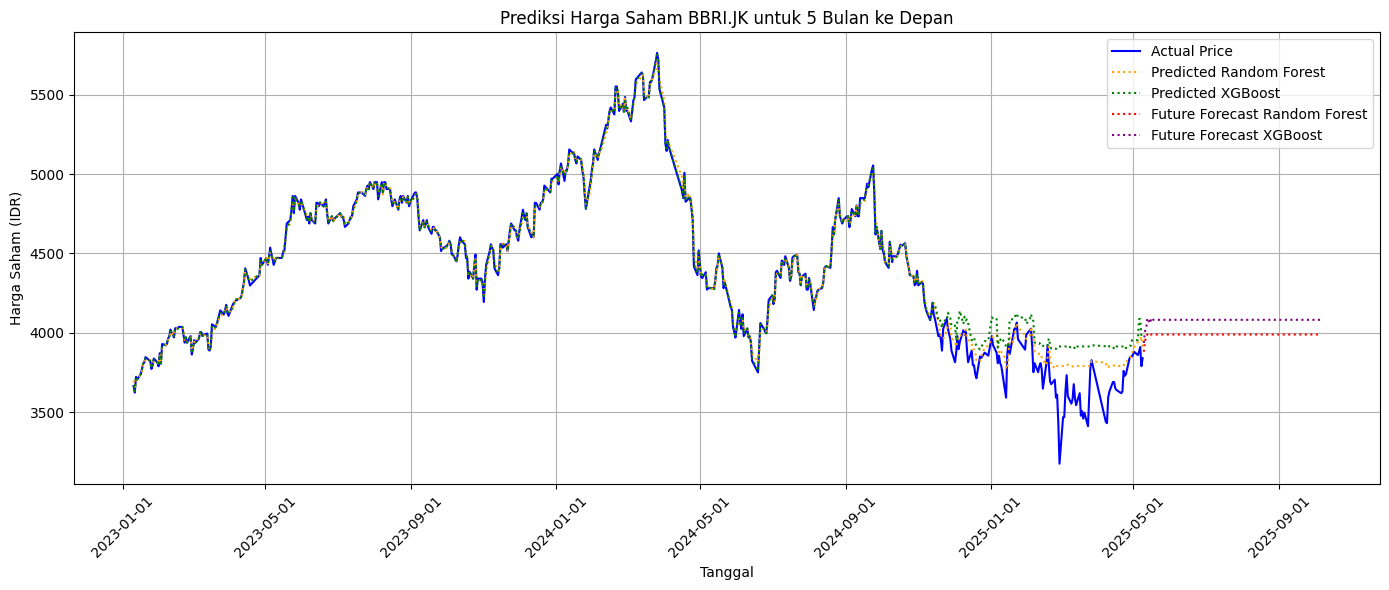

In [ ]:
# Visualisasi
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')
plt.plot(data['Date'], model_rf.predict(X), label='Predicted Random Forest', linestyle='dotted', color='orange')
plt.plot(data['Date'], model_xgb.predict(X), label='Predicted XGBoost', linestyle='dotted', color='green')
plt.plot(future_dates, future_preds_rf, label='Future Forecast Random Forest', linestyle='dotted', color='red')
plt.plot(future_dates, future_preds_xgb, label='Future Forecast XGBoost', linestyle='dotted', color='purple')
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham (IDR)")
plt.title(f"Prediksi Harga Saham {ticker} untuk 5 Bulan ke Depan")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
